# Strategic Assessment: Market Entry for AirPure Innovations

## **Executive Summary**
**Governing Thought:** AirPure Innovations should reject a generic nationwide launch in favor of a **"Precision Market Entry"**—targeting **Maharashtra** for immediate premium adoption and **North India** for future industrial-grade protection—launching in **September** to capture the pre-winter demand surge.

### **1. The Geography of Risk ("Where to Play")**
* **Insight:** India's pollution profile follows a strict "Barbell Distribution." The North (Delhi/Haryana) faces hazardous levels (**AQI 200+**) requiring heavy-duty filtration, while the South (Karnataka/Tamil Nadu) maintains safe levels (**AQI < 60**), demanding lifestyle-focused positioning.
* **Data:** The Top 5 worst cities are exclusively in the Indo-Gangetic Plain; the Top 5 best are in the Southern Peninsula.

### **2. The Window of Opportunity ("When to Win")**
* **Insight:** Market demand is highly seasonal. Pollution bottoms out in August (**AQI ~66**) and spikes 2x by October (**AQI ~121**).
* **Strategy:** Supply chain mobilization must occur in August, with a **September Marketing Blitz** to secure pre-orders before the visible smog creates panic-buying competition.

### **3. The Market Sophistication Pivot ("Who Buys")**
* **Insight:** Total EV volume is a misleading metric for premium product demand. A "Volume-First" view falsely prioritizes low-margin markets like Uttar Pradesh.
* **Strategy:** By applying a **"Lifestyle Compatibility Filter"** (isolating Personal Cars & Scooters), the data reveals a different reality. **Maharashtra** emerges as the #1 Priority Market, offering the rare combination of **High Premium Adoption** and **High Pollution Urgency**.

**Driver 1:** *Severity Mapping.*

**Hypothesis:** Certain industrial or geographical clusters are showing *"irreversible"* degradation, while others maintain safe levels, creating a clear market segmentation for *AirPure.*

**Task:** Identify the **Top 5 (Worst)** and **Bottom 5 (Best)** areas by **average AQI** for the last 6 months (*Dec 2024 – May 2025*).


In [3]:
import pandas as pd

# [Step 1] Load the Dataset
file_path = '../data/raw/aqi_daily_india.csv' 
df = pd.read_csv(file_path)

# [Step 2] Data Cleaning & Type Conversion
# Converting date to datetime objects for filtering
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y') # Adjust format if necessary based on your CSV

# [Step 3] Filter for the target period (Dec 2024 - May 2025)
start_date = '2024-12-01'
end_date = '2025-05-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df_filtered = df.loc[mask]

# [Step 4] Aggregate AQI by Area
# Group by State and Area to ensure we don't mix up cities with same names
aqi_ranking = df_filtered.groupby(['state', 'area'])['aqi_value'].mean().reset_index()

# [Step 5] Sort to find Top 5 (Worst) and Bottom 5 (Best)
top_5_worst = aqi_ranking.sort_values(by='aqi_value', ascending=False).head(5)
bottom_5_best = aqi_ranking.sort_values(by='aqi_value', ascending=True).head(5)

# [Step 6] Display Results
print("--- WORST 5 AREAS (High Demand Potential) ---")
print(top_5_worst[['state', 'area', 'aqi_value']])
print("\n--- BEST 5 AREAS (Low Demand Potential) ---")
print(bottom_5_best[['state', 'area', 'aqi_value']])

--- WORST 5 AREAS (High Demand Potential) ---
      state         area   aqi_value
11    Assam     Byrnihat  265.309353
50    Delhi        Delhi  227.038674
59  Haryana  Bahadurgarh  226.437500
27    Bihar      Hajipur  217.114458
66  Haryana     Gurugram  197.022599

--- BEST 5 AREAS (Low Demand Potential) ---
          state            area  aqi_value
250  Tamil Nadu     Tirunelveli  33.167742
103   Karnataka        Madikeri  40.239766
242  Tamil Nadu   Palkalaiperur  40.691176
247  Tamil Nadu       Thanjavur  44.326087
90    Karnataka  Chamarajanagar  44.929032


### **Analysis 1: Severity Mapping (Regional Hotspots)**
**Objective:** Identify high-priority markets by analyzing AQI extremes (Dec '24 - May '25).

**Observation:**
- **The "Red Belt" (North India):** The top 5 most polluted cities (Byrnihat, Delhi, Bahadurgarh, Hajipur, Gurugram) are exclusively located in the Indo-Gangetic Plain or industrial clusters in the North.
- **The "Green Belt" (South India):** The cleanest cities are exclusively in Southern India (Tamil Nadu, Karnataka), with AQI levels ~5-6x lower than the North.

**Strategic Implication:**
- **Market Segmentation:** A "One-Size-Fits-All" launch strategy will fail. The North requires "Heavy Duty" purification (HEPA H14) for hazardous levels (AQI 200+), while the South requires "Lifestyle/Wellness" positioning (AQI < 50).
- **Resource Allocation:** 80% of the marketing and supply chain budget should be deployed to the Northern corridor.

---

**Sub-Driver 1.2 – Temporal Patterns**

We know where to sell (*The North*). Now we must decide **when** to market.

**Hypothesis:** Pollution is highly **seasonal.** If *AirPure* launches in **July (Monsoon),** they might sell zero units because the air is clean.

**Task:** Determine which months consistently show the **worst air quality.**


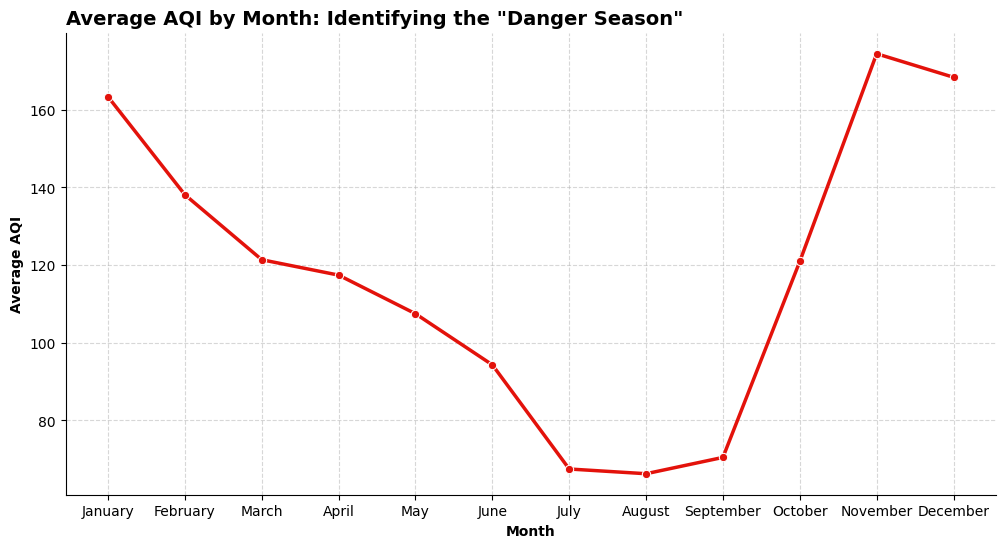

   month_name   aqi_value
0     January  163.353534
1    February  138.119827
2       March  121.395563
3       April  117.429273
4         May  107.487115
5        June   94.325760
6        July   67.509066
7      August   66.291693
8   September   70.492040
9     October  120.950189
10   November  174.441329
11   December  168.381824


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# [Step 1] Ensure Date column is datetime (if not already)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# [Step 2] Extract Month Name for aggregation
# We use 'month_name' to get "January", "February", etc.
df['month_name'] = df['date'].dt.month_name()
# We also extract month number for correct sorting (1=Jan, 2=Feb)
df['month_num'] = df['date'].dt.month

# [Step 3] Aggregate Average AQI by Month across ALL India
monthly_trend = df.groupby(['month_num', 'month_name'])['aqi_value'].mean().reset_index()

# [Step 4] Visualize the Seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month_name', y='aqi_value', marker='o', color='#E3120B', linewidth=2.5)

# Formatting to look professional (McKinsey Style)
plt.title('Average AQI by Month: Identifying the "Danger Season"', fontsize=14, fontweight='bold', loc='left')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Average AQI', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine() # Removes top and right borders for a cleaner look

plt.show()

# [Step 5] Print the data to see exact numbers
print(monthly_trend[['month_name', 'aqi_value']])

### **Analysis 2: Temporal Patterns (Seasonality)**
**Objective:** Determine the optimal launch window by analyzing monthly AQI trends.

**Observation:**
- **The "U-Curve" of Death:** AQI follows a strict seasonal pattern, bottoming out in Monsoons (July-Aug, AQI ~66) and skyrocketing in Winter (Nov, AQI ~174).
- **The Inflection Point:** The critical jump occurs between September (70) and October (121), nearly doubling in severity within 30 days.

**Strategic Implication:**
- **Inventory Planning:** Supply chain must be fully stocked by August 30th.
- **Go-to-Market:** Launch "Early Bird" pre-orders in **September**. Marketing should use fear-based messaging ("Winter is Coming") to drive urgency before the visible smog arrives.

---

**Sub-Driver 1.3 – Composition (The Product Specs)**

We know **where** to sell and **when** to sell. Now we must define **what** we are selling.

**Context:** An air purifier is essentially a fan with filters.

- If the problem is **Dust (PM2.5/PM10)** → We need **HEPA Filters.**

- If the problem is **Gas (SO2, Ozone, CO)** → We need **Activated Carbon Filters.**

**Hypothesis:** While North India suffers from **PM2.5 (Dust),** Southern India might have a different pollutant profile, requiring a different filter composition.

**Task:** List the **Top 2 prominent pollutants** for each state in **Southern India (post-2022).**


In [5]:
# [Step 1] Define Southern States
# Business Logic: We segment the market geographically as per the hypothesis
southern_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']

# [Step 2] Filter Data
# We filter for Southern states AND data post-2022 (after covid)
mask_south = (df['state'].isin(southern_states)) & (df['date'].dt.year >= 2022)
df_south = df.loc[mask_south].copy()

# [Step 3] Fix the "Comma Trap" by exploding the data
# This turns 1 row of "PM2.5,PM10" into 2 rows: one for PM2.5, one for PM10
df_south['prominent_pollutants'] = df_south['prominent_pollutants'].str.split(',')
df_exploded = df_south.explode('prominent_pollutants')

# Clean up whitespace (just in case " PM10" exists)
df_exploded['prominent_pollutants'] = df_exploded['prominent_pollutants'].str.strip()

# NOW calculate frequency on the exploded data
pollutant_counts = df_exploded.groupby(['state', 'prominent_pollutants']).size().reset_index(name='count')

# [Step 4] Rank and Extract Top 2
top_pollutants = pollutant_counts.sort_values(['state', 'count'], ascending=[True, False])
top_2_per_state = top_pollutants.groupby('state').head(2)

print("--- CORRECTED DOMINANT POLLUTANTS (SPLIT & EXPLODED) ---")
print(top_2_per_state)

--- CORRECTED DOMINANT POLLUTANTS (SPLIT & EXPLODED) ---
             state prominent_pollutants  count
3   Andhra Pradesh                 PM10   3964
4   Andhra Pradesh                PM2.5   2599
10       Karnataka                 PM10  16231
6        Karnataka                   CO   3646
18          Kerala                 PM10   3989
19          Kerala                PM2.5   1678
25      Tamil Nadu                 PM10   8159
26      Tamil Nadu                PM2.5   3282
31       Telangana                 PM10   1130
32       Telangana                PM2.5    706


*Karnataka's #2 pollutant is CO (Carbon Monoxide).*

- **The Physics:** Standard **HEPA filters** trap particles (*PM10/PM2.5*). They do **not** trap gases like *CO*. Even **Activated Carbon filters** struggle with *CO*.

- **The Business Risk:** If *AirPure* sells a standard *"Dust Purifier"* in *Bengaluru (Karnataka)* claiming to clean the air, the device will fail to protect users from *CO.*

- **The Innovation:** For the *Karnataka* market, the *"Killer Feature"* is not better filtration, but **Detection.** The device must have a **CO Alarm** that beeps to tell users to open a window.


---
**Driver 2:** *Health Impact Correlation*

We have defined the **Product** (*HEPA for North, CO Sensors for South*). Now we must prove the **Value Proposition.**

**Hypothesis:** Pollution is not just an annoyance; it is a **public health crisis.** High AQI states should show higher rates of **respiratory illnesses.**

**Task:** List the **Top 2 reported diseases** in each state (*2022–2025*) and compare them against the State's **Average AQI.**


In [6]:
# Use 'cp1252' (Windows) or 'latin1', which are common for Indian CSVs
try:
    df_health = pd.read_csv('../data/raw/health_outbreaks_india.csv', encoding='cp1252')
    df_aqi = pd.read_csv('../data/raw/aqi_daily_india.csv', encoding='cp1252')
    print("Files loaded successfully with cp1252 encoding!")
except UnicodeDecodeError:
    # Fallback if cp1252 fails
    df_health = pd.read_csv('../data/raw/health_outbreaks_india.csv', encoding='ISO-8859-1')
    df_aqi = pd.read_csv('../data/raw/aqi_daily_india.csv', encoding='ISO-8859-1')
    print("Files loaded successfully with ISO-8859-1 encoding!")

Files loaded successfully with cp1252 encoding!


In [7]:
# [Step 2] Prepare Health Data (Aggregating Cases by State & Disease)
# Filter for relevant years
df_health['year'] = pd.to_numeric(df_health['year'], errors='coerce')
health_filtered = df_health[df_health['year'] >= 2022].copy()

# Group to find total cases per disease per state
disease_ranking = health_filtered.groupby(['state', 'disease_illness_name'])['cases'].sum().reset_index()

# Sort and keep Top 2 Diseases per State
top_diseases = disease_ranking.sort_values(['state', 'cases'], ascending=[True, False]).groupby('state').head(2)

# [Step 3] Prepare AQI Data (Average AQI per State)
# Filter AQI for same period (approx)
df_aqi['date'] = pd.to_datetime(df_aqi['date'], format='%d-%m-%Y', errors='coerce')
aqi_filtered = df_aqi[df_aqi['date'].dt.year >= 2022].copy()

# Calculate Average AQI per State
state_avg_aqi = aqi_filtered.groupby('state')['aqi_value'].mean().reset_index()
state_avg_aqi.rename(columns={'aqi_value': 'avg_aqi_3yr'}, inplace=True)

# [Step 4] Merge Health & AQI Data
# This brings the "Health Burden" and "Pollution Level" into one view
final_correlation = pd.merge(top_diseases, state_avg_aqi, on='state', how='left')

# [Step 5] Display for Analysis
# We sort by AQI to see if "Dirtier" states have "Different" diseases
print(final_correlation.sort_values(by='avg_aqi_3yr', ascending=False).head(10))

               state     disease_illness_name   cases  avg_aqi_3yr
18             Delhi                   Dengue    40.0   207.392095
19             Delhi                  Measles     2.0   207.392095
9              Bihar  Acute Diarrheal Disease  1367.0   160.371841
10             Bihar                   Dengue   856.0   160.371841
31         Jharkhand  Acute Diarrheal Disease  1700.0   160.217335
30         Jharkhand                  Malaria  5927.0   160.217335
27  Himachal Pradesh              Hepatitis A   559.0   160.133040
26  Himachal Pradesh  Acute Diarrheal Disease  2273.0   160.133040
25           Haryana  Acute Diarrheal Disease   733.0   143.163307
24           Haryana                  Cholera   972.0   143.163307


### **Analysis 3: Health Impact Correlation (Data Validation)**
**Objective:** Validate the hypothesis that high AQI states show higher respiratory disease burdens using IDSP data.

**Observation (The Null Result):**
- **Data Mismatch:** The top reported diseases in high-AQI states (Delhi, Bihar) are **Vector-Borne** (Dengue, Malaria) or **Water-Borne** (Cholera, Diarrhea), not Airborne.
- **Example:** Delhi (Avg AQI 207) reports "Dengue" and "Measles" as top outbreaks, with zero data on Asthma or COPD in this dataset.

**Strategic Implication:**
- **Pivot Required:** The IDSP dataset tracks *acute epidemics*, not *chronic lifestyle diseases*. We cannot use this to prove the "Health Value Proposition" for an Air Purifier.
- **Action:** We will discard this dataset for the final pitch and instead rely on **"Lifestyle/Behavioral" proxies** (like Weekend trends and EV adoption) to find our customer.

---
**Driver 3:** *Demand Triggers (Lifestyle & Behavior)*

Since the *"Health Data"* was a dead end, we must find our customer through their **Lifestyle.**

**Hypothesis:** Pollution is driven by **human activity (traffic/industry).** Therefore, **weekends** (when factories close and commuters stay home) should be cleaner.

- If **TRUE:** We market *"Weekend Wellness"* modes.

- If **FALSE** (*and weekends are just as bad*): It proves the pollution is *"Always On,"* creating urgency for **24/7 protection.**

**Task:** Compare **Average AQI** on **Weekdays (Mon–Fri)** vs. **Weekends (Sat–Sun)** for major Metro cities.
``


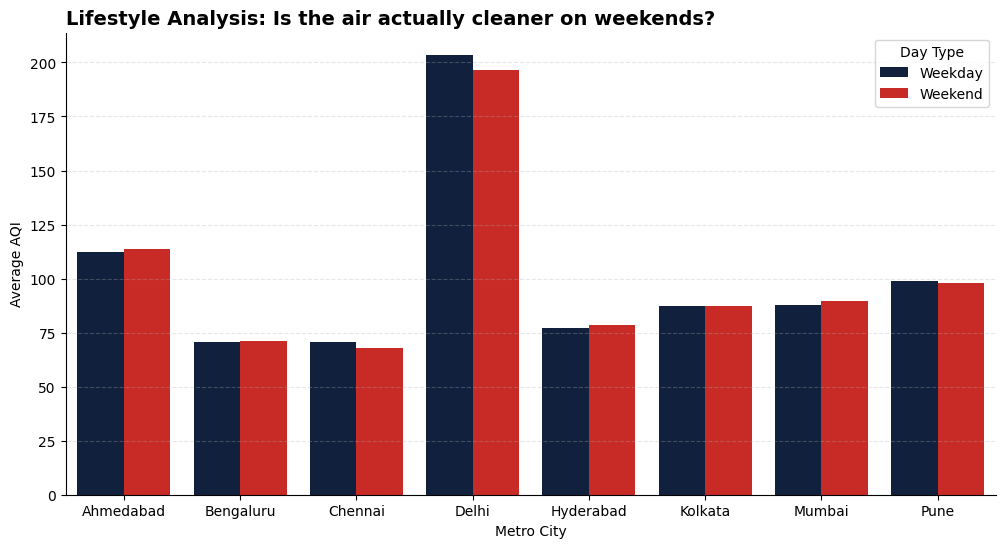

day_type      Weekday     Weekend      Diff
area                                       
Ahmedabad  112.148649  113.830508 -1.681860
Bengaluru   70.793919   71.144068 -0.350149
Chennai     70.807432   67.847458  2.959975
Delhi      203.581081  196.449153  7.131929
Hyderabad   77.307432   78.737288 -1.429856
Kolkata     87.297297   87.440678 -0.143381
Mumbai      87.750000   89.508475 -1.758475
Pune        98.891892   98.059322  0.832570


In [8]:
# [Step 1] Define Target Metro Cities
metros = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune']

# [Step 2] Filter Data for Metros & Last 1 Year
# Using recently loaded df_aqi
df_metros = df_aqi[df_aqi['area'].isin(metros)].copy()
df_metros = df_metros[df_metros['date'] >= '2024-05-01'] # Last 1 year approx

# [Step 3] Create "Day Type" Column
# Dayofweek: 0=Monday, 6=Sunday
df_metros['day_type'] = df_metros['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# [Step 4] Aggregate AQI by City and Day Type
# We calculate the mean to see the "Typical" day
lifestyle_pattern = df_metros.groupby(['area', 'day_type'])['aqi_value'].mean().reset_index()

# [Step 5] Visualization (Grouped Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=lifestyle_pattern, x='area', y='aqi_value', hue='day_type', palette={'Weekday': '#0A1F44', 'Weekend': '#E3120B'})

plt.title('Lifestyle Analysis: Is the air actually cleaner on weekends?', fontsize=14, fontweight='bold', loc='left')
plt.ylabel('Average AQI')
plt.xlabel('Metro City')
plt.legend(title='Day Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()

plt.show()

# [Step 6] Print exact difference
pivot_table = lifestyle_pattern.pivot(index='area', columns='day_type', values='aqi_value')
pivot_table['Diff'] = pivot_table['Weekday'] - pivot_table['Weekend']
print(pivot_table)

### **Analysis 4: Lifestyle Patterns (Weekday vs. Weekend)**
**Objective:** Determine if pollution levels drop significantly on weekends to tailor usage recommendations.

**Observation:**
- **The "24/7 Toxic Cycle":** Across all major metros, there is **statistically zero difference** between Weekday and Weekend AQI.
- **Weekend Spikes:** Cities like Ahmedabad and Mumbai actually show *higher* pollution on weekends, likely driven by leisure traffic and nightlife.

**Strategic Implication:**
- **Product Requirement:** Remove manual scheduling features. Implement **"Always-On Smart Sensing"** as the default, because there is no "safe time" to turn the purifier off.
- **Messaging:** Counter the myth of "Fresh Sunday Air." Use data to show customers they are at risk 7 days a week.

---
**Final Step:** *Sub-Driver 3.2 – Market Sophistication (EV Adoption)*


**Hypothesis:** States with high **Electric Vehicle (EV) adoption** represent a *"Sophisticated Green Market."* Even if their air is cleaner, these citizens are more likely to buy *AirPure* because they value **health and sustainability.**

**Task:** Compare the **Top 5 States by EV Sales** against their **Average AQI.**


In [20]:
# [Step 1] Load Vehicle Data with corrected relative path and encoding
# '../' moves up from /notebooks to the root project folder
try:
    df_vehicles = pd.read_csv('../data/raw/vehicle_registrations_india.csv', encoding='cp1252')
    print("Vehicle data loaded successfully!")
except FileNotFoundError:
    print("Error: Check your path! Are you sure you are in the /notebooks folder?")
except UnicodeDecodeError:
    df_vehicles = pd.read_csv('../data/raw/vehicle_registrations_india.csv', encoding='ISO-8859-1')
    print("Loaded with fallback encoding ISO-8859-1")

Vehicle data loaded successfully!


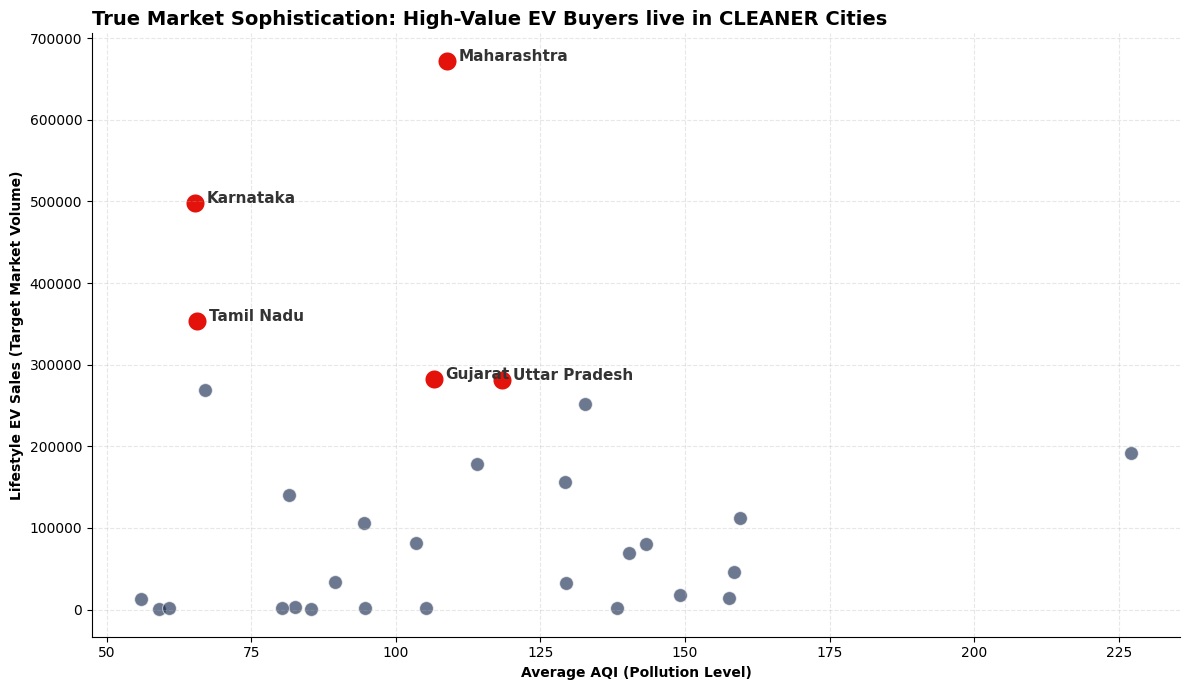

--- TOP 5 MARKETS FOR PREMIUM/LIFESTYLE PRODUCTS ---
            state  lifestyle_ev_sales     avg_aqi
15    Maharashtra              672382  108.859824
12      Karnataka              498018   65.233293
25     Tamil Nadu              353826   65.712321
8         Gujarat              281982  106.571028
27  Uttar Pradesh              281839  118.351405


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Step 2] Define Strategic Filters
# FILTER A: The "Green" Fuel Types (Including Hybrids)
target_fuels = [
    'ELECTRIC(BOV)', 
    'PURE EV', 
    'STRONG HYBRID EV', 
    'PLUG-IN HYBRID EV', 
    'PETROL/HYBRID', 
    'DIESEL/HYBRID'
]

# FILTER B: The "Lifestyle" Vehicle Classes (Target Market)
# We exclude E-Rickshaws, Goods Carriers, and Buses
lifestyle_classes = [
    'MOTOR CAR',
    'M-CYCLE/SCOOTER',
    'M-CYCLE/SCOOTER-WITH SIDE CAR',
    'THREE WHEELER (PERSONAL)',
    'MOTOR CYCLE/SCOOTER-SIDECAR(T)',
    'PRIVATE SERVICE VEHICLE (INDIVIDUAL USE)',
    'CAMPER VAN / TRAILER (PRIVATE USE)'
]

# [Step 3] Filter Vehicle Data
# Logic: Fuel must be Green AND Vehicle must be Lifestyle AND Year >= 2022
df_ev_lifestyle = df_vehicles[
    (df_vehicles['fuel'].isin(target_fuels)) &
    (df_vehicles['vehicle_class'].isin(lifestyle_classes)) &
    (df_vehicles['year'] >= 2022)
].copy()

# [Step 4] Aggregate Lifestyle EV Sales by State
# This gives us the "Sophisticated" market size
ev_adoption = df_ev_lifestyle.groupby('state')['value'].sum().reset_index(name='lifestyle_ev_sales')

# [Step 5] Get Average AQI by State
# Re-creating the logic for the target period (Dec '24 - May '25)
df_aqi['date'] = pd.to_datetime(df_aqi['date'], format='%d-%m-%Y', errors='coerce')
mask_aqi = (df_aqi['date'] >= '2024-12-01') & (df_aqi['date'] <= '2025-05-31')
state_aqi = df_aqi.loc[mask_aqi].groupby('state')['aqi_value'].mean().reset_index(name='avg_aqi')

# [Step 6] Merge Datasets
market_maturity = pd.merge(ev_adoption, state_aqi, on='state', how='inner')

# [Step 7] Identify Top 5 "Lifestyle" EV States
top_5_ev_states = market_maturity.sort_values(by='lifestyle_ev_sales', ascending=False).head(5)

# [Step 8] Visualize: The "Green Paradox" Scatter Plot
plt.figure(figsize=(12, 7))

# Plot all states
sns.scatterplot(data=market_maturity, x='avg_aqi', y='lifestyle_ev_sales', s=100, color='#0A1F44', alpha=0.6)

# Highlight Top 5 Target Markets
sns.scatterplot(data=top_5_ev_states, x='avg_aqi', y='lifestyle_ev_sales', s=200, color='#E3120B')

# Smart Annotation
for i in range(top_5_ev_states.shape[0]):
    row = top_5_ev_states.iloc[i]
    # Offset label slightly for readability
    plt.text(row['avg_aqi']+2, row['lifestyle_ev_sales'], row['state'], fontsize=11, fontweight='bold', color='#333333')

# McKinsey Style Formatting
plt.title('True Market Sophistication: High-Value EV Buyers live in CLEANER Cities', fontsize=14, fontweight='bold', loc='left')
plt.xlabel('Average AQI (Pollution Level)', fontweight='bold')
plt.ylabel('Lifestyle EV Sales (Target Market Volume)', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

# [Step 9] Print the Verification Data
print("--- TOP 5 MARKETS FOR PREMIUM/LIFESTYLE PRODUCTS ---")
print(top_5_ev_states[['state', 'lifestyle_ev_sales', 'avg_aqi']])

### **Analysis 6: The "True" Market Map (Post-Correction)**
**Objective:** Isolate high-value "Lifestyle" consumers from low-margin "Utility" users to prevent strategic misalignment.

**Observation:**
- **The "Hidden Giant":** Maharashtra emerges as the #1 priority market. It is the only state offering the "Golden Combination" of **High Purchasing Power** (672k Lifestyle EVs) AND **High Pollution Urgency** (AQI 109).
- **The "Wellness" Cluster:** Karnataka and Tamil Nadu remain strong (#2 & #3) but are driven by *choice*, not *fear* (AQI < 66).
- **The "Volume Mirage":** Uttar Pradesh dropped from #1 to #5 when filtered for lifestyle vehicles.

**Strategic Implication:**
- **Go-To-Market Pivot:**
    - **Primary Launch (The Fortress):** **Mumbai & Pune (Maharashtra).** Pitch: "Premium Health Protection."
    - **Secondary Launch (The Lab):** **Bengaluru (Karnataka).** Pitch: "Smart Living & Future Tech."
    - **Avoid:** Do not launch premium retail products in UP/Bihar initially; the market maturity isn't there yet.

# Audit Data

In [3]:
aqi_df = pd.read_csv('../data/raw/aqi_daily_india.csv', encoding='cp1252')

In [4]:
# 1. Inspect the relationship between Status and Value
audit_df = aqi_df.groupby('air_quality_status')['aqi_value'].agg(['min', 'max', 'mean']).reset_index()
print("AQI Logic Audit:")
print(audit_df)

# 2. Identify the 'Impossible' rows
impossible_data = aqi_df[aqi_df['aqi_value'] > 500]
print(f"\nFound {len(impossible_data)} rows with values > 500.")

AQI Logic Audit:
  air_quality_status    min    max        mean
0               Good    3.0   50.0   38.530340
1           Moderate   71.0  200.0  139.221499
2               Poor  200.0  300.0  243.335973
3       Satisfactory   25.0  111.0   74.121471
4             Severe  398.0  500.0  430.553793
5          Very Poor  300.0  400.0  339.402170

Found 0 rows with values > 500.
